In [ ]:
# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# qual GPU estou usando
!nvidia-smi

In [ ]:
#
!pip install diffusers==0.11.1

In [ ]:
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

In [5]:
import torch
from diffusers import StableDiffusionPipeline

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4', torch_dtype=torch.float16)

In [7]:
pipe = pipe.to('cuda')

In [8]:
# otimização de recursos
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [ ]:
# primeira imagem

In [23]:
# Prompt
prompt = 'an orange'

In [24]:
# imagem
img = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [18]:
type(img)

PIL.Image.Image

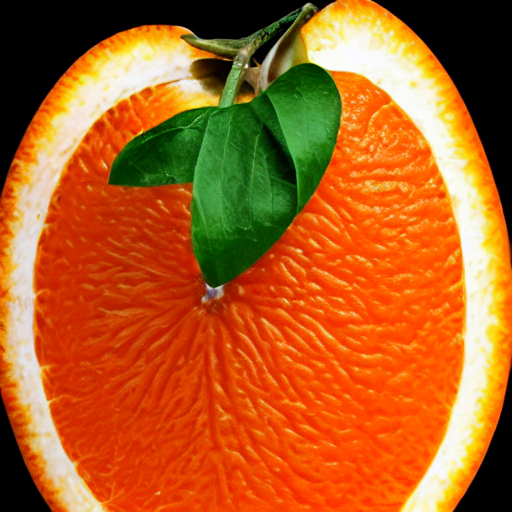

In [25]:
img

  0%|          | 0/50 [00:00<?, ?it/s]

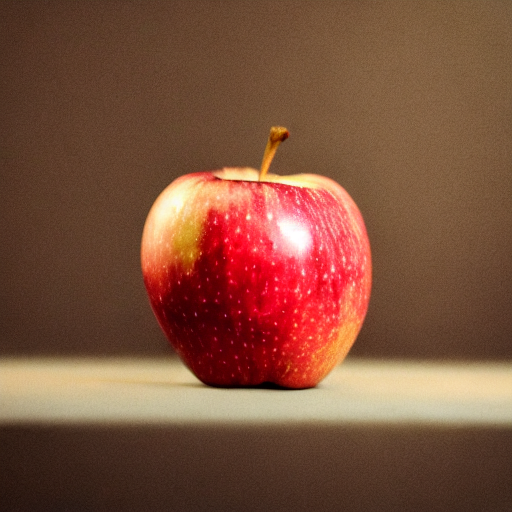

In [28]:
# Prompt
prompt = 'photograph of an apple'
img = pipe(prompt).images[0]
img

In [29]:
# salvar a imagem
img.save('Resultado.png')

  0%|          | 0/50 [00:00<?, ?it/s]

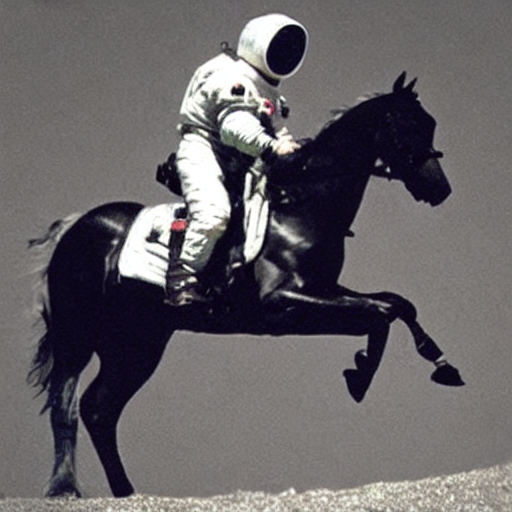

In [30]:
prompt = 'a photograph of an astronaut riding a horse'
img = pipe(prompt).images[0]
img

In [31]:
# salvar a imagem
img.save('Resultado.png')

In [34]:
# gerando varias imagens
from PIL import Image

def grid_img(imgs, rows, cols, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w * scale), int(h * scale)

  grid = Image.new('RGB', size = (cols * w, rows * h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
    img = img.resize((w, h), Image.ANTIALIAS)
    grid.paste(img, box = (i % cols * w, i // cols * h))

  return grid

  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-34-9afcd366ce36>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w, h), Image.ANTIALIAS)


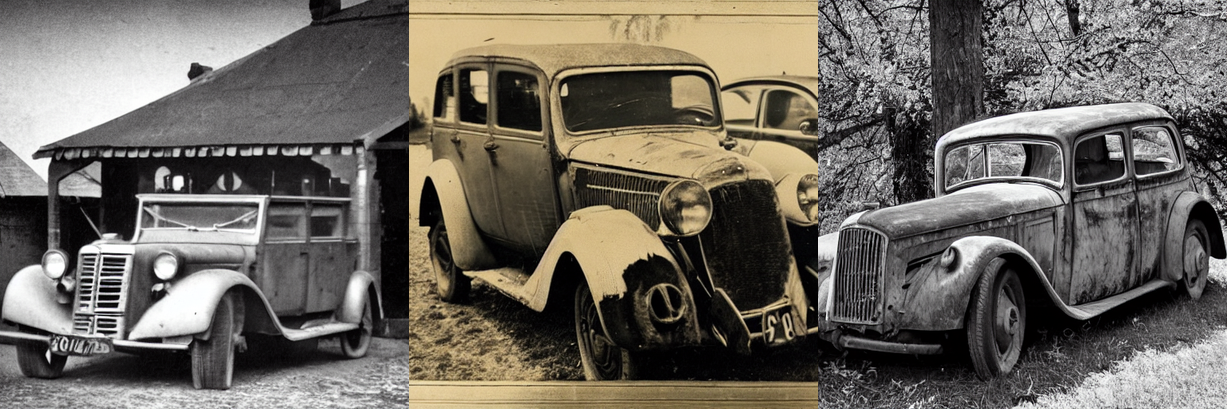

In [35]:
num_imgs = 3
prompt = 'photograph of an old car'
imgs = pipe(prompt, num_images_per_prompt=num_imgs).images
grid = grid_img(imgs, rows=1, cols=3, scale=0.80)
grid

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.